In [1]:
# useful starting line 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
cd ../

/home/mbanga/Documents/Epfl/ml_revisions


# Load Data

In [3]:
from leastSquares.helpers import load_data
from leastSquares.least_squares import least_squares
from linearRegression_gradientDescent import costs as cts
# load dataset
x, y = load_data()
print("shape of x {v}".format(v=x.shape))
print("shape of y {v}".format(v=y.shape))

shape of x (50,)
shape of y (50,)


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [4]:
def kfold_iter(y, tx, k, seed=1, shuffle=True):
    """Generate a fold iterator for a dataset."""
    np.random.seed(seed)
    
    data_size = len(y)
    
    if shuffle == True:
        shuffled_indices = np.random.permutation(np.arange(data_size))
        shuffled_tx = tx[shuffled_indices]
        shuffled_y = y[shuffled_indices]
    else:
        shuffled_tx = tx
        shuffled_y = y
        
    fold_size = ceil(data_size / k)
    for fold_num in range(k):
        start_index = fold_num * fold_size
        end_index = min((fold_num+1) * fold_size, data_size)
        mask = np.array([i in np.arange(start_index, end_index) for i in range(data_size)])
        data_test = (shuffled_tx[mask], shuffled_y[mask])
        data_train = (shuffled_tx[~mask], shuffled_y[~mask])
        yield data_train, data_test

In [5]:
from leastSquares.build_polynomial import build_poly
from ridgeRegression.ridge_regression import ridge_regression
from math import ceil

def cross_validation(y, tx, k, lambda_):
    """return the loss of ridge regression."""
    N, D = tx.shape
    
    ws = np.zeros((k, D))
    rmse_train = []
    rmse_test  = []
    for i, data in enumerate(kfold_iter(y, tx, k)):       
        data_train, data_test = data
        # get train and test data 
        tx_train, y_train = data_train
        tx_test, y_test = data_test
        # find optimal weights (ridge regression)
        loss_train, w_star = ridge_regression(y_train, tx_train, lambda_)
        loss_test = cts.ridge_mse(y_test, tx_test, w_star, lambda_)
        # update
        ws[i, :] = w_star
        rmse_train.append(loss_train)
        rmse_test.append(loss_test)
    # aggregate weights across each iteration
#     w_star = np.mean(ws, axis=0)
    
    return rmse_train, rmse_test, ws

In [9]:
from crossValidation.plots import cross_validation_visualization

def cross_validation_demo(y, tx, seed = 1,
                                 k_fold = 4,
                                 lambdas = np.logspace(-4, 0, 30)):
    
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    # cross validation
    for lambda_ in lambdas:
        l_tr, l_te, _ = cross_validation(y, tx, k_fold, lambda_)
        rmse_tr.append(np.mean(l_tr))
        rmse_te.append(np.mean(l_te))

    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

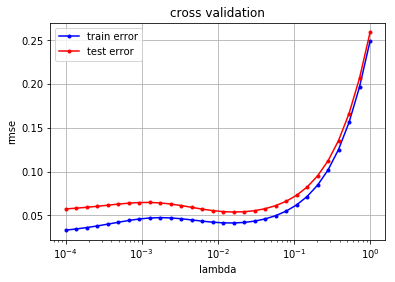

In [10]:
degree = 7

tx = build_poly(x, degree)
cross_validation_demo(y, tx)

In [13]:
def extended_cross_validation_demo(y, tx, seed = 1,
                                 k_fold = 4,
                                 lambdas = np.logspace(-4, 0, 20)):
    
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    
    # cross validation
    for lambda_ in lambdas:
        l_tr, l_te, _ = cross_validation(y, tx, k_fold, lambda_)
        rmse_tr.append(l_tr)
        rmse_te.append(l_te)

    plt.boxplot(rmse_te)

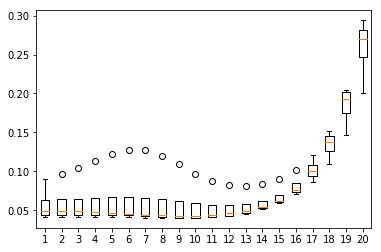

In [14]:
extended_cross_validation_demo(y, tx)